In [126]:
# Nasser Althaiban   800764203   Homework1

# Problem 3 part a:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()
m = len(housing)
m
housing.shape
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [128]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',]
# Defining the map function
def binary_map(x):
     return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [129]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.shape



(381, 13)

In [130]:
df_test.shape

(164, 13)

In [131]:
num_vars = [ 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
359,3600,3,1,1,1,3710000
19,6420,3,2,2,1,8855000
159,3150,3,2,1,0,5460000
35,7000,3,2,4,2,8080940
28,7950,5,2,2,2,8400000


In [132]:
# Here we can see that except for area, all the columns have small integer values.
#So it is extremely important to rescale the variables so that they have a comparable s
#If we don't have comparable scales, then some of the coefficients as obtained by fitti
#This might become very annoying at the time of model evaluation.
##So it is advised to use standardization or normalization so that the units of the coef
#As you know, there are two common ways of rescaling:
#1. Min-Max scaling
#2. Standardisation (mean-0, sigma-1)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars]  = scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head()


,area,bedrooms,bathrooms,stories,parking,price
359,0.155227,0.4,0.0,0.000000,0.333333,0.169697
19,0.403379,0.4,0.5,0.333333,0.333333,0.615152
159,0.115628,0.4,0.5,0.000000,0.000000,0.321212
35,0.454417,0.4,0.5,1.000000,0.666667,0.548133
28,0.538015,0.8,0.5,0.333333,0.666667,0.575758


In [133]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain
X_Newtrain.head()
theta = np.zeros(6)
theta
#df_Newtrain
#y_Newtrain

array([0., 0., 0., 0., 0., 0.])

In [134]:
y = y_Newtrain.values
m = len(X_Newtrain)
X_0 = np.ones((m, 1))            
X1    = df_Newtrain.values[:,0]
X2    = df_Newtrain.values[:,1]
X3    = df_Newtrain.values[:,2]
X4    = df_Newtrain.values[:,3]
X5    = df_Newtrain.values[:,4]

X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))

In [135]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest.values
y_test = y_Newtest.values
m_test = len(X_Newtest)
X_0_test = np.ones((m_test, 1))            

X1_test    = df_Newtest.values[:,0]
X2_test    = df_Newtest.values[:,1]
X3_test    = df_Newtest.values[:,2]
X4_test    = df_Newtest.values[:,3]
X5_test    = df_Newtest.values[:,4]

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))


In [136]:
def compute_cost(X, y, theta, m, Lambda):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta)
    sqrTheta_new = np.delete(sqrTheta, 0)  
    J = 1 / (2 * m) * (np.sum(sqrErrors) + Lambda * np.sum(sqrTheta_new)) 
    return J

In [137]:
def compute_cost_test(X_test, y_test, theta, m_test):
    predictions = X_test.dot(theta)
    errors = np.subtract(predictions, y_test)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m_test) * np.sum(sqrErrors)
    return J


In [138]:
def gradient_descent(X, y, theta, alpha, iterations, Lambda):
    cost_train = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = np.array(theta)*(parameter_penalty) - sum_delta;             
        cost_train[i] = compute_cost(X, y, theta, m, Lambda)    
        cost_test[i] = compute_cost_test(X_test, y_test, theta, m_test)         
    
    return theta, cost_train, cost_test

In [139]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 100;
alpha = 0.1
Lambda = 1
p = (1 - (alpha * Lambda) / m)
parameter_penalty = np.full(shape=5, fill_value=p)
parameter_penalty = np.insert(parameter_penalty, 0, 1)

In [140]:
cost = compute_cost(X, y, theta, m, Lambda)
cost
theta, cost_train, cost_test = gradient_descent(X, y, theta, alpha, iterations, Lambda)
print('Final value of theta=', theta)
print('cost_train =', cost_train)
print('cost_test =', cost_test)

Final value of theta= [0.12518197 0.13047067 0.08009379 0.12528494 0.11301687 0.09685164]
cost_train = [0.03651734 0.02929997 0.02395814 0.02000158 0.01706822 0.01489066
 0.01327144 0.01206473 0.01116282 0.01048616 0.00997603 0.00958903
 0.00929312 0.00906464 0.0088861  0.0087446  0.0086306  0.00853705
 0.00845874 0.00839184 0.00833349 0.0082816  0.00823461 0.00819137
 0.00815103 0.00811296 0.00807669 0.00804187 0.00800824 0.00797561
 0.00794384 0.00791282 0.00788246 0.00785271 0.00782351 0.00779483
 0.00776663 0.0077389  0.00771162 0.00768477 0.00765833 0.00763231
 0.00760667 0.00758143 0.00755656 0.00753207 0.00750794 0.00748417
 0.00746075 0.00743767 0.00741494 0.00739254 0.00737047 0.00734872
 0.00732729 0.00730617 0.00728536 0.00726485 0.00724464 0.00722472
 0.00720509 0.00718575 0.00716668 0.00714789 0.00712937 0.00711111
 0.00709312 0.00707539 0.0070579  0.00704067 0.00702368 0.00700694
 0.00699043 0.00697416 0.00695811 0.00694229 0.0069267  0.00691133
 0.00689617 0.00688122 0.0

Text(0.5, 1.0, 'Convergence of gradient descent Problem3 a')

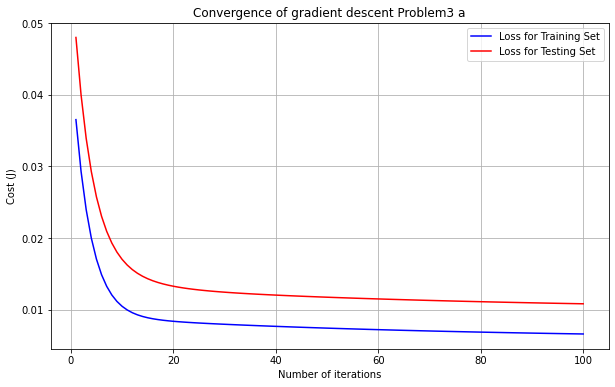

In [141]:
plt.plot(range(1, iterations + 1),cost_train, color='blue', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Testing Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Problem3 a')